**Data Preprocessing**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
wine=pd.read_csv("winequality-white.csv")
X=wine.iloc[:,0:11]
y=wine.iloc[:,11]
from sklearn.model_selection import train_test_split                
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=791) 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()                         
scaler.fit(X_train)                         
X_train_scaled = scaler.transform(X_train)   
X_test_scaled = scaler.transform(X_test)

**Building models for predicting the quality of wine**

**The dataset can be used for both classification and regression**

**Creating a kNN classifier with default parameters**

In [2]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(leaf_size=25,n_neighbors=5,p=3)            
clf.fit(X_train_scaled, y_train)
acc_train = clf.score(X_train_scaled, y_train)
acc_test = clf.score(X_test_scaled, y_test)
y_pred=clf.predict(X_test_scaled)
print("Training set accuracy: {:.2f}".format(acc_train))  
print("Test set accuracy: {:.2f}".format(acc_test)) 
clf.score

Training set accuracy: 0.71
Test set accuracy: 0.55


<bound method ClassifierMixin.score of KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')>

**Classification Report**

In [3]:
print('Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.11      0.05      0.07        41
           5       0.56      0.61      0.58       381
           6       0.58      0.64      0.61       538
           7       0.51      0.45      0.48       214
           8       0.20      0.04      0.07        47
           9       0.00      0.00      0.00         1

    accuracy                           0.55      1225
   macro avg       0.28      0.26      0.26      1225
weighted avg       0.53      0.55      0.54      1225



C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Confusion Metrics**

In [4]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[  0   0   0   3   0   0   0]
 [  0   2  25  14   0   0   0]
 [  0   8 231 129  12   1   0]
 [  0   7 124 344  58   5   0]
 [  0   1  28  87  96   2   0]
 [  0   0   4  19  22   2   0]
 [  0   0   0   1   0   0   0]]


**Cross validation using 10 folds**

In [5]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,X,y,cv=10)
print("Score :"+str(scores))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Score :[0.37804878 0.42682927 0.4004065  0.37474542 0.3706721  0.40899796
 0.39468303 0.44672131 0.43942505 0.39425051]


**Applying GridSearch on KNN classifier**

In [6]:
param_grid={'leaf_size':[25,30,35],
           'n_neighbors':[4,5,6],
            'p':[1,2,3]}
print(param_grid)

{'leaf_size': [25, 30, 35], 'n_neighbors': [4, 5, 6], 'p': [1, 2, 3]}


In [7]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(),param_grid,cv=10)
grid_search.fit(X_train_scaled,y_train)
print("Test score is "+str(grid_search.score(X_test_scaled,y_test)))
print("Best parameters:"+str(grid_search.best_params_))
print("Best grid search score:"+str(grid_search.best_score_))
print("Best estimator:"+str(grid_search.best_estimator_))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Test score is 0.5510204081632653
Best parameters:{'leaf_size': 25, 'n_neighbors': 5, 'p': 3}
Best grid search score:0.55785461475633
Best estimator:KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')


**Buliding a Knn regressor with default parameters**

In [56]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(leaf_size= 25, n_neighbors= 5, p=1)
knn_reg.fit(X_train_scaled, y_train)
y_pred=knn_reg.predict(X_test_scaled)
print("R^2 on test data is {}".format(knn_reg.score(X_test_scaled, y_test)))
knn_reg.score

R^2 on test data is 0.3240455793063295


<bound method RegressorMixin.score of KNeighborsRegressor(algorithm='auto', leaf_size=25, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='uniform')>

**Cross Validation using 10 folds**

In [57]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_reg,X,y,cv=10)
print("Score :"+str(scores))

Score :[-0.04095937  0.09883771 -0.0353256   0.01056333 -0.01364225  0.09507632
  0.04511177  0.05550075 -0.04527793 -0.11843722]


**Applying Grid Search**

In [58]:
param_grid={'leaf_size':[25,30,35],
           'n_neighbors':[4,5,6],
            'p':[1,2,3]}
print(param_grid)

{'leaf_size': [25, 30, 35], 'n_neighbors': [4, 5, 6], 'p': [1, 2, 3]}


In [59]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(KNeighborsRegressor(),param_grid,cv=10)
grid_search.fit(X_train_scaled,y_train)
print("Test score is "+str(grid_search.score(X_test_scaled,y_test)))
print("Best parameters:"+str(grid_search.best_params_))
print("Best grid search score:"+str(grid_search.best_score_))
print("Best estimator:"+str(grid_search.best_estimator_))

Test score is 0.3240455793063295
Best parameters:{'leaf_size': 25, 'n_neighbors': 5, 'p': 1}
Best grid search score:0.35740126212484935
Best estimator:KNeighborsRegressor(algorithm='auto', leaf_size=25, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='uniform')


**Buliding Gaussian Naive Bayes model**

In [3]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train_scaled,y_train)
y_pred=gnb.predict(X_test_scaled)
print("The accuracy of this model is :", metrics.accuracy_score(y_test,y_pred)*100)
gnb.score

The accuracy of this model is : 43.673469387755105


<bound method ClassifierMixin.score of GaussianNB(priors=None, var_smoothing=1e-09)>

**Classification Report**

In [61]:
print('Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           3       0.17      0.33      0.22         3
           4       0.34      0.24      0.29        41
           5       0.51      0.53      0.52       381
           6       0.49      0.33      0.39       538
           7       0.34      0.68      0.46       214
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00         1

    accuracy                           0.44      1225
   macro avg       0.26      0.30      0.27      1225
weighted avg       0.44      0.44      0.42      1225



**Confusion Metrics**

In [62]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[  1   0   1   0   1   0   0]
 [  0  10  22   6   3   0   0]
 [  4  11 201 122  43   0   0]
 [  1   6 150 178 199   0   4]
 [  0   1  18  48 145   1   1]
 [  0   1   1  12  32   0   1]
 [  0   0   0   1   0   0   0]]


**Cross Validation using 10 folds**

In [63]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(gnb,X,y,cv=10)
print("Score :"+str(scores))

Score :[0.4796748  0.45325203 0.44918699 0.41547862 0.42566191 0.48670757
 0.42331288 0.41188525 0.41273101 0.43737166]


C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


**Creating a linear regression model**

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)
acc_test = regressor.score(X_test_scaled, y_test)
print("Test set accuracy: {:.2f}".format(acc_test))
regressor.score

Test set accuracy: 0.28


<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

**Cross Validation using 10 folds**

In [66]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(regressor,X,y,cv=10)
print("Score :"+str(scores))

Score :[0.20502617 0.21618349 0.26908166 0.33561807 0.18005104 0.31454844
 0.25606632 0.35661201 0.16991299 0.1948102 ]


**Logistic regression model for wine prediction**

In [80]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
acc_test = log_reg.score(X_test_scaled, y_test)
y_pred=log_reg.predict(X_test_scaled)
print("Test set accuracy: {:.2f}".format(acc_test)) 
log_reg.score

Test set accuracy: 0.51


C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

**Classification Report**

In [81]:
print('Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        41
           5       0.57      0.46      0.51       381
           6       0.49      0.80      0.61       538
           7       0.48      0.07      0.12       214
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00         1

    accuracy                           0.51      1225
   macro avg       0.22      0.19      0.18      1225
weighted avg       0.48      0.51      0.45      1225



C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Confusion Metrics**

In [82]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[  0   0   0   3   0   0   0]
 [  0   0  30  11   0   0   0]
 [  0   0 177 203   1   0   0]
 [  0   0  99 431   8   0   0]
 [  0   0   4 196  14   0   0]
 [  0   0   0  41   6   0   0]
 [  0   0   0   1   0   0   0]]


**Cross Validation using 10 folds**

In [83]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(log_reg,X,y,cv=10)
print("Score :"+str(scores))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence thi

Score :[0.43902439 0.52642276 0.4898374  0.49287169 0.48676171 0.60940695
 0.5194274  0.54918033 0.59137577 0.51129363]


**Applying Grid Search**

In [84]:
param_grid={'intercept_scaling':[1,2],
           'max_iter':[100,200]}
print(param_grid)
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(log_reg,param_grid,cv=10)
grid_search.fit(X_train_scaled,y_train)
print("Test score is "+str(grid_search.score(X_test_scaled,y_test)))
print("Best parameters:"+str(grid_search.best_params_))
print("Best grid search score:"+str(grid_search.best_score_))
print("Best estimator:"+str(grid_search.best_estimator_))

{'intercept_scaling': [1, 2], 'max_iter': [100, 200]}


C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence thi

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\b

Test score is 0.5061224489795918
Best parameters:{'intercept_scaling': 2, 'max_iter': 100}
Best grid search score:0.5333514838007078
Best estimator:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=2, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


**Building the decision tree classifier**

In [86]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled,y_train)
y_pred = clf.predict(X_test_scaled)
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))
clf.score

Accuracy on test data: 0.5959183673469388


<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>

**Classification Report**

In [87]:
print('Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.30      0.24      0.27        41
           5       0.62      0.63      0.63       381
           6       0.66      0.65      0.66       538
           7       0.49      0.51      0.50       214
           8       0.36      0.36      0.36        47
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1225
   macro avg       0.35      0.34      0.35      1225
weighted avg       0.59      0.60      0.59      1225



C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Confusion Metrics**

In [88]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[  0   0   1   2   0   0   0]
 [  0  10  24   4   3   0   0]
 [  2  13 241  88  29   8   0]
 [  0  10  96 352  70  10   0]
 [  0   0  17  75 110  12   0]
 [  0   0   6  13  11  17   0]
 [  0   0   1   0   0   0   0]]


**Cross Validation using 10 folds**

In [89]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,X,y,cv=10)
print("Score :"+str(scores))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Score :[0.41869919 0.42886179 0.32113821 0.37678208 0.39918534 0.44171779
 0.41104294 0.47336066 0.45790554 0.40451745]


**Creating Linear Perceptron**

In [97]:
from sklearn import linear_model
lm = linear_model.SGDClassifier(loss="perceptron",max_iter=1000,eta0=1)
lm.fit(X_train_scaled, y_train)
y_pred = lm.predict(X_test_scaled)
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))
lm.score

Accuracy on test data: 0.38448979591836735


<bound method ClassifierMixin.score of SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='perceptron',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)>

**Classification Report**

In [93]:
print('Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        41
           5       0.36      0.96      0.53       381
           6       0.49      0.18      0.26       538
           7       0.50      0.03      0.06       214
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00         1

    accuracy                           0.38      1225
   macro avg       0.19      0.17      0.12      1225
weighted avg       0.42      0.38      0.29      1225



C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Confusion Metrics**

In [94]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[  0   0   2   1   0   0   0]
 [  0   0  41   0   0   0   0]
 [  0   0 367  14   0   0   0]
 [  0   1 437  95   5   0   0]
 [  0   0 142  64   7   1   0]
 [  0   0  26  19   2   0   0]
 [  0   0   1   0   0   0   0]]


**Cross Validation using 10 folds**

In [96]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lm,X,y,cv=10)
print("Score :"+str(scores))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Score :[0.44512195 0.2703252  0.35569106 0.47250509 0.28309572 0.1799591
 0.45807771 0.21311475 0.44969199 0.18069815]


**Applying Grid Search**

In [98]:
param_grid={'max_iter':[100,500,1000]
           }
print(param_grid)

{'max_iter': [100, 500, 1000]}


In [99]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(lm,param_grid,cv=10)
grid_search.fit(X_train_scaled,y_train)
print("Test score is "+str(grid_search.score(X_test_scaled,y_test)))
print("Best parameters:"+str(grid_search.best_params_))
print("Best grid search score:"+str(grid_search.best_score_))
print("Best estimator:"+str(grid_search.best_estimator_))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Test score is 0.36653061224489797
Best parameters:{'max_iter': 100}
Best grid search score:0.4756329975496869
Best estimator:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='perceptron',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Building Linear SVC**

In [4]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))
acc_test = model.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(acc_test))

Accuracy on test data: 0.5053061224489795
Test set accuracy: 0.51


In [5]:
model.score

<bound method ClassifierMixin.score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>

**Classification Report**

In [6]:
print('Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        41
           5       0.57      0.47      0.52       381
           6       0.48      0.82      0.61       538
           7       0.00      0.00      0.00       214
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00         1

    accuracy                           0.51      1225
   macro avg       0.15      0.18      0.16      1225
weighted avg       0.39      0.51      0.43      1225



C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Confusion Metrics**

In [7]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[  0   0   0   3   0   0   0]
 [  0   0  29  12   0   0   0]
 [  0   0 180 201   0   0   0]
 [  0   0  99 439   0   0   0]
 [  0   0   7 207   0   0   0]
 [  0   0   0  47   0   0   0]
 [  0   0   0   1   0   0   0]]


**Applying Grid Search**

In [8]:
param_grid={'cache_size':[200,300,400],
           'degree':[3,4,5]}
print(param_grid)

{'cache_size': [200, 300, 400], 'degree': [3, 4, 5]}


In [9]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model,param_grid,cv=10)
grid_search.fit(X_train_scaled,y_train)
print("Test score is "+str(grid_search.score(X_test_scaled,y_test)))
print("Best parameters:"+str(grid_search.best_params_))
print("Best grid search score:"+str(grid_search.best_score_))
print("Best estimator:"+str(grid_search.best_estimator_))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Test score is 0.5028571428571429
Best parameters:{'cache_size': 200, 'degree': 3}
Best grid search score:0.5243670024503131
Best estimator:SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


**Building a SVM-RBF classifier**

In [10]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf').fit(X_train,y_train)
pred_svc=svc.predict(X_test)
svc.score(X_test,y_test)
print("Accuracy on test data:",metrics.accuracy_score(y_test, pred_svc))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on test data: 0.5485714285714286


In [11]:
svc.score

<bound method ClassifierMixin.score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>

**Classification Report**

In [12]:
print('Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_svc))

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.05      0.09        41
           5       0.61      0.45      0.52       381
           6       0.52      0.78      0.62       538
           7       0.57      0.35      0.43       214
           8       1.00      0.04      0.08        47
           9       0.00      0.00      0.00         1

    accuracy                           0.55      1225
   macro avg       0.53      0.24      0.25      1225
weighted avg       0.59      0.55      0.52      1225



C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Confusion Metrics**

In [13]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,pred_svc))

Confusion Matrix
[[  0   0   1   2   0   0   0]
 [  0   2   9  28   2   0   0]
 [  0   0 172 200   9   0   0]
 [  0   0  78 421  39   0   0]
 [  0   0  16 123  75   0   0]
 [  0   0   4  35   6   2   0]
 [  0   0   0   1   0   0   0]]


**Cross Validation using 10 folds**

In [14]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svc,X,y,cv=10)
print("Score :"+str(scores))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Contin

Score :[0.39430894 0.42886179 0.43089431 0.44195519 0.43380855 0.50511247
 0.47239264 0.44877049 0.48665298 0.43326489]


**Applying Grid Search**

In [15]:
param_grid={'cache_size':[200,300,400],
           'degree':[3,4,5]}
print(param_grid)
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svc,param_grid,cv=10)
grid_search.fit(X_train_scaled,y_train)
print("Test score is "+str(grid_search.score(X_test_scaled,y_test)))
print("Best parameters:"+str(grid_search.best_params_))
print("Best grid search score:"+str(grid_search.best_score_))
print("Best estimator:"+str(grid_search.best_estimator_))

{'cache_size': [200, 300, 400], 'degree': [3, 4, 5]}


C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Contin

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

Test score is 0.49142857142857144
Best parameters:{'cache_size': 200, 'degree': 3}
Best grid search score:0.5170160631636265
Best estimator:SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


**Building a Random Forest Classifier**

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=791)
clf.fit(X_train_scaled,y_train)
y_pred_f=clf.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5053061224489795


C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
clf.score

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=791,
                       verbose=0, warm_start=False)>

**Classification Report**

In [18]:
print('Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        41
           5       0.57      0.47      0.52       381
           6       0.48      0.82      0.61       538
           7       0.00      0.00      0.00       214
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00         1

    accuracy                           0.51      1225
   macro avg       0.15      0.18      0.16      1225
weighted avg       0.39      0.51      0.43      1225



C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Confusion Metrics**

In [19]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[  0   0   0   3   0   0   0]
 [  0   0  29  12   0   0   0]
 [  0   0 180 201   0   0   0]
 [  0   0  99 439   0   0   0]
 [  0   0   7 207   0   0   0]
 [  0   0   0  47   0   0   0]
 [  0   0   0   1   0   0   0]]


**Cross Validation using 10 folds**

In [20]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,X,y,cv=10)
print("Score :"+str(scores))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Score :[0.44512195 0.49796748 0.43902439 0.45213849 0.49898167 0.53169734
 0.49488753 0.54508197 0.56057495 0.49897331]


**Applying Grid Search**

In [21]:
param_grid={ 'min_samples_leaf':[1,2,3],
            'min_samples_split':[2,3,4],
           'n_estimators':[10,11,12]}
print(param_grid)

{'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4], 'n_estimators': [10, 11, 12]}


In [22]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(clf,param_grid,cv=10)
grid_search.fit(X_train_scaled,y_train)
print("Test score is "+str(grid_search.score(X_test_scaled,y_test)))
print("Best parameters:"+str(grid_search.best_params_))
print("Best grid search score:"+str(grid_search.best_score_))
print("Best estimator:"+str(grid_search.best_estimator_))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Test score is 0.6612244897959184
Best parameters:{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 12}
Best grid search score:0.6474271712496596
Best estimator:RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=791,
                       verbose=0, warm_start=False)


**Creating XGBoost Classifier**

In [2]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
model = XGBClassifier(random_state=791)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Accuracy: 66.37%


In [24]:
model.score

<bound method ClassifierMixin.score of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=791, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

**Classification Report**

In [25]:
print('Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.86      0.29      0.44        41
           5       0.70      0.69      0.69       381
           6       0.65      0.75      0.70       538
           7       0.61      0.56      0.58       214
           8       0.79      0.32      0.45        47
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1225
   macro avg       0.52      0.37      0.41      1225
weighted avg       0.67      0.66      0.66      1225



C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Confusion Metrics**

In [26]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[  0   0   1   2   0   0   0]
 [  0  12  20   9   0   0   0]
 [  0   2 262 101  16   0   0]
 [  0   0  84 405  47   2   0]
 [  0   0   5  88 119   2   0]
 [  0   0   1  18  13  15   0]
 [  0   0   1   0   0   0   0]]


**Cross Validation using 10 folds**

In [27]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=10)
print("Score :"+str(scores))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Score :[0.48373984 0.49186992 0.45121951 0.48268839 0.53360489 0.56646217
 0.49284254 0.51434426 0.54414784 0.51334702]


**Applying Grid Search**

In [28]:
param_grid={'max_depth':[6,7,8],
           'n_estimators':[100,200],
            }
print(param_grid)

{'max_depth': [6, 7, 8], 'n_estimators': [100, 200]}


In [29]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model,param_grid,cv=10)
grid_search.fit(X_train_scaled,y_train)
print("Test score is "+str(grid_search.score(X_test_scaled,y_test)))
print("Best parameters:"+str(grid_search.best_params_))
print("Best grid search score:"+str(grid_search.best_score_))
print("Best estimator:"+str(grid_search.best_estimator_))

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Test score is 0.6742857142857143
Best parameters:{'max_depth': 7, 'n_estimators': 100}
Best grid search score:0.6607677647699428
Best estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=791, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


**Feature Importance**

In [3]:
importance = model.feature_importances_

In [4]:
for i,v in enumerate(importance):  
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07233
Feature: 1, Score: 0.10882
Feature: 2, Score: 0.07245
Feature: 3, Score: 0.07984
Feature: 4, Score: 0.07412
Feature: 5, Score: 0.09015
Feature: 6, Score: 0.06940
Feature: 7, Score: 0.07229
Feature: 8, Score: 0.07539
Feature: 9, Score: 0.07231
Feature: 10, Score: 0.21289


**Plotting the feature importance**

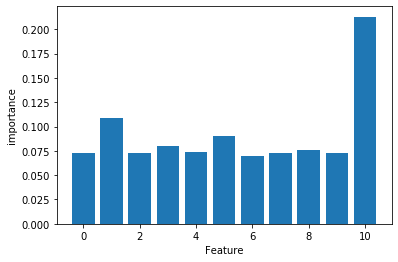

In [6]:
plt.bar([x for x in range(len(importance))], importance)
plt.savefig('feature.png',dpi=400)
plt.xlabel('Feature')
plt.ylabel('importance')
plt.savefig('feature.png',dpi=400)
plt.show()